# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

## Data Quality Checks and Data Cleaning

Ensuring quality data for further analysis is very important for reliable results. In this notebook, you will learn about the basic steps involved in data quality checks and data cleaning.

In this notebook, you will perform the following steps:

1. [Read the Data](#read) 
2. [Explore the Data](#understand)
3. [Null Values](#null)
4. [Duplicate Values](#duplicate)
5. [Outliers](#outliers)
    
<a id='read'></a> 
## Read the data

You will be dealing with Apple's stock price data. The first step is to read the data. The data is stored in a CSV file. You can use the `read_csv()` method of the `pandas` library to read a CSV file.

Syntax:
```python
import pandas as pd
pd.read_csv(filename,index_col)
```
1. **filename**: Path + name of the file in the string format
2. **index_col**: The column number to set as index

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# The data is stored in the directory 'data_modules'
path = '../data_modules/'

# Read the data using read_csv
apple_price_data = pd.read_csv(path + 'AAPL.csv', index_col=0)

# Set the index to a datetime object
apple_price_data.index = pd.to_datetime(apple_price_data.index)

<a id='understand'></a> 
## Explore the Data

One of the first steps to perform when you receive the data is to understand what you have received. Explore what the dataset contains - the variables in it, their type, number of missing values and so on.

You can use the `head()` or the `tail()` method of `pandas` to view the first or the last 5 rows of the dataframe.

Syntax:
```python
DataFrame.head()

DataFrame.tail()
```

In [2]:
# Display the last five rows
# You can also check the first five rows 
apple_price_data.tail()

,close,high,low,open,volume
date,,,,,
2020-08-28 14:45:00+00:00,500.793,501.490,500.35,500.540,100338.0
2020-08-28 15:00:00+00:00,502.088,502.240,501.79,501.810,75560.0
2020-08-28 15:15:00+00:00,501.500,501.559,501.29,501.459,46052.0
2020-08-28 15:30:00+00:00,504.340,505.410,504.30,504.880,310614.0
2020-08-28 15:45:00+00:00,498.890,499.730,498.81,499.545,1010884.0


From the above output, you can see that your data has five columns, namely `close`, `high`, `low`, `open` and `volume`. You can further use the `info()` to understand more about these columns. The `info()` method will provide a concise summary of the DataFrame.

Syntax:
```python
DataFrame.info()
```

In [3]:
# Display the concise summary of the data
apple_price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30137 entries, 2016-01-04 09:30:00+00:00 to 2020-08-28 15:45:00+00:00
Data columns (total 5 columns):
close     30133 non-null float64
high      30137 non-null float64
low       30137 non-null float64
open      30137 non-null float64
volume    30137 non-null float64
dtypes: float64(5)
memory usage: 1.4 MB


This shows the column names, the number of non-null values in each column and the data type of each column. You can also see the total number of rows in the dataset, which is 30137 in this case.

Although this indirectly shows the null values in each column, you can also use `.isna().sum()` to get the number of null observations in each column.

Syntax:
```python
DataFrame.isna().sum()
```

In [4]:
# Display the count of null values
apple_price_data.isna().sum()

close     4
high      0
low       0
open      0
volume    0
dtype: int64

Thus, you can now see the `close` column has 4 missing or null values. 

<a id='null'></a> 
## Null Values

The missing values found above might affect the machine learning model and cause it to give erroneous results. So you need to deal with these missing values appropriately.

The easiest way to deal with this is to just ignore the observations having missing values. This is feasible only when the missing observations make up for a small fraction of the entire dataset. Neglecting a large number of observations might shorten your database and give false results. There are other techinques to deal with large number of missing values which is beyond the scope of this notebook.

You can use the `dropna()` method to drop the rows with missing values.

Syntax:
```python
DataFrame.dropna(inplace=True)
```

Parameters:<br>
`inplace:` This takes two values, `True` or `False`. If `True`, the changes are saved in the existing dataframe. If `False`, the changes are not saved. By default, the value is `False`.

After dropping the null values, you can check the number of rows in the dataframe by using the `shape` method.

Syntax:
```python
DataFrame.shape[0]
```

In [5]:
# Drop the missing values
apple_price_data.dropna(inplace=True)

# Print the number of rows in the dataframe
print('Number of rows: ', apple_price_data.shape[0])

# Display the count of null values
apple_price_data.isna().sum()

Number of rows:  30133


close     0
high      0
low       0
open      0
volume    0
dtype: int64

After dropping the null values, you can see that the resulting dataframe has no null values and the number of rows has reduced from 30137 to 30133.

<a id='duplicate'></a> 
## Duplicate Values

There may be duplicate values in the dataset. This may happen due to human error while gathering the data or may occur while merging datasets from different sources. You can use `duplicated().value_counts()` to check the count of duplicate values.

Syntax:
```python
DataFrame.duplicated().value_counts()
```

`duplicated()` returns a series of `True` and `False` indicating whether the corresponding observation is duplicated or not. <br>
`value_counts()` returns the count of `True` and `False`.

In [6]:
# Display the count of duplicate values
print(apple_price_data.duplicated().value_counts())
print('Proportion of duplicate values is {}.'.format( 
      round(apple_price_data.duplicated().value_counts()[1]/apple_price_data.shape[0],
            4)))

False    29918
True       215
dtype: int64
Proportion of duplicate values is 0.0071.


Thus you can see the dataset has 215 duplicate values, i.e. approximately 0.7%. A general rule of thumb is to ignore the duplicate values if they are less than 0.5%. This is because, if the proportion is very low, duplicate values can also be because of chance. If it is higher than 0.5%, you can check if the consecutive values are duplicate. If the consecutive values are duplicate, you can drop them.

In [7]:
# Drop the consecutive duplicate values
apple_price_data = apple_price_data.loc[(apple_price_data['close'].diff() != 0) | 
                                        (apple_price_data['open'].diff() != 0) |
                                        (apple_price_data['high'].diff() != 0) |
                                        (apple_price_data['low'].diff() != 0)]

# Check the number of rows
print("Number of rows: ", apple_price_data.shape[0])

Number of rows:  29927


Thus you can see that, after dropping the consecutive duplicate values, the number of rows has reduced from 30133 to 29927.

<a id='outliers'></a> 
## Outliers

Outliers are values that are unusually large or small for the column. There are multiple ways to visualise them. You can calculate the percentage change and plot a graph of the change. If the change is too big, it suggests an outlier.

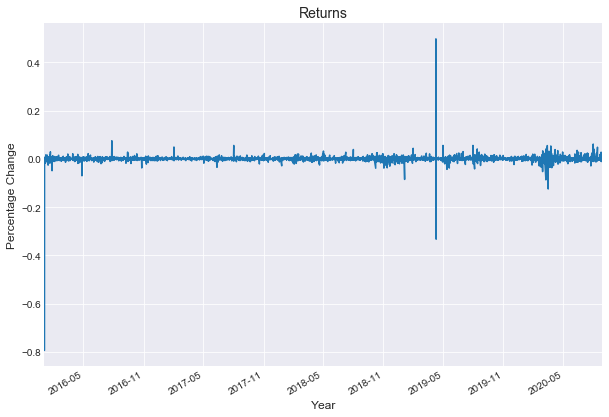

In [8]:
# Calculate the percentage change
apple_price_data['returns'] = apple_price_data['close'].pct_change()

# Plot the percentage change
plt.figure(figsize=(10,7))
apple_price_data['returns'].plot()
# Set the title and axes label
plt.title('Returns', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change', fontsize=12)
# Show the plot
plt.show()

In the above chart, you can see huge spikes:
* One at the beginning
* Second a little after 2019 <br>

These lines means that the change is huge at one particular time step. This can be due to some error in recording, suggesting the presence of an outlier.

## Conclusion

Data cleaning is an important part of any process that deals with data. Without it, the analysis might fail and give misleading results. 
<br><br>